In [3]:
# Librerías necesarias para el modelo
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator
import random

In [4]:
def compile_fit(capas,activation,last_activation,epochs,input_dim,x_train, x_test, y_train, y_test):

    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)
    
    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation=activation,input_dim=input_dim))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation=last_activation))          
        else:
            model.add(Dense(neuronas_capa, activation=activation))

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,verbose=False) 

    return model, history
    
def plot_loss(axes, history, title):
    # Colores y estilos
    COLOR_TRAIN = "#003B80"
    COLOR_VAL = "#003B80"
    
    # Valores finales
    loss_train = round(history['loss'][-1], 2)
    loss_val = round(history['val_loss'][-1], 2)
    
    # Plotting
    axes.plot(history['loss'], 
             linestyle="dotted", 
             label=f"Entrenamiento: {loss_train}", 
             color=COLOR_TRAIN)
    
    axes.plot(history['val_loss'], 
             linestyle="solid", 
             label=f"Validación: {loss_val}", 
             color=COLOR_VAL)
    
    # Configuración del gráfico
    axes.set_title(f"Pérdida - {title}", fontsize=13, pad=15, color="#003B80")
    axes.set_xlabel('Épocas', fontsize=11, color="#003B80")
    axes.set_ylabel('Pérdida', fontsize=11, color="#003B80")
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    axes.set_ylim(ymin=0,ymax=1.1)
    axes.yaxis.set_major_locator(MultipleLocator(0.1))
    
    # Estilo
    axes.set_facecolor("#F0F7FF")
    axes.grid(visible=True, which='major', color="white", linewidth=1.5)
    axes.legend(loc="upper right", frameon=False)

def plot_accuracy(axes, history, title):
    # Colores y estilos
    COLOR_TRAIN = "#4ECDC4"
    COLOR_VAL = "#45B7D1"
    
    # Valores finales
    acc_train = round(history['accuracy'][-1], 2)
    acc_val = round(history['val_accuracy'][-1], 2)
    
    # Plotting
    axes.plot(history['accuracy'], 
             linestyle="dotted", 
             label=f"Entrenamiento: {acc_train}", 
             color=COLOR_TRAIN)
    
    axes.plot(history['val_accuracy'], 
             linestyle="solid", 
             label=f"Validación: {acc_val}", 
             color=COLOR_VAL)
    
    # Configuración del gráfico
    axes.set_title(f"Precisión - {title}", fontsize=13, pad=15, color="#003B80")
    axes.set_xlabel('Épocas', fontsize=11, color="#003B80")
    axes.set_ylabel('Precisión', fontsize=11, color="#003B80")
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    axes.set_ylim(ymin=0,ymax=1.1)
    axes.yaxis.set_major_locator(MultipleLocator(0.1))
    
    # Estilo
    axes.set_facecolor("#F0F7FF")
    axes.grid(visible=True, which='major', color="white", linewidth=1.5)
    axes.legend(loc="lower right", frameon=False)

In [5]:
def get_datos():
  datos=load_iris()
  x=datos.data
  y=datos.target
  label_binarizer = LabelBinarizer()
  label_binarizer.fit(range(max(y)+1))
  y = label_binarizer.transform(y)

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test=get_datos()

epochs = 100
input_dim = x_train.shape[1]
# capas = [8, 16, 32, 64, 32, 16, 8, 3]
# capas = [64, 32, 16, 8, 3]
capas = [64, 3]
activacion = "relu"

modelo, history = compile_fit(capas,activacion,"softmax",epochs,input_dim,x_train, x_test, y_train, y_test)

c:\Users\alanm\Desktop\IABD\PIA\Ejercicios\ejercicios-raul\Modelo-Flores-API\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


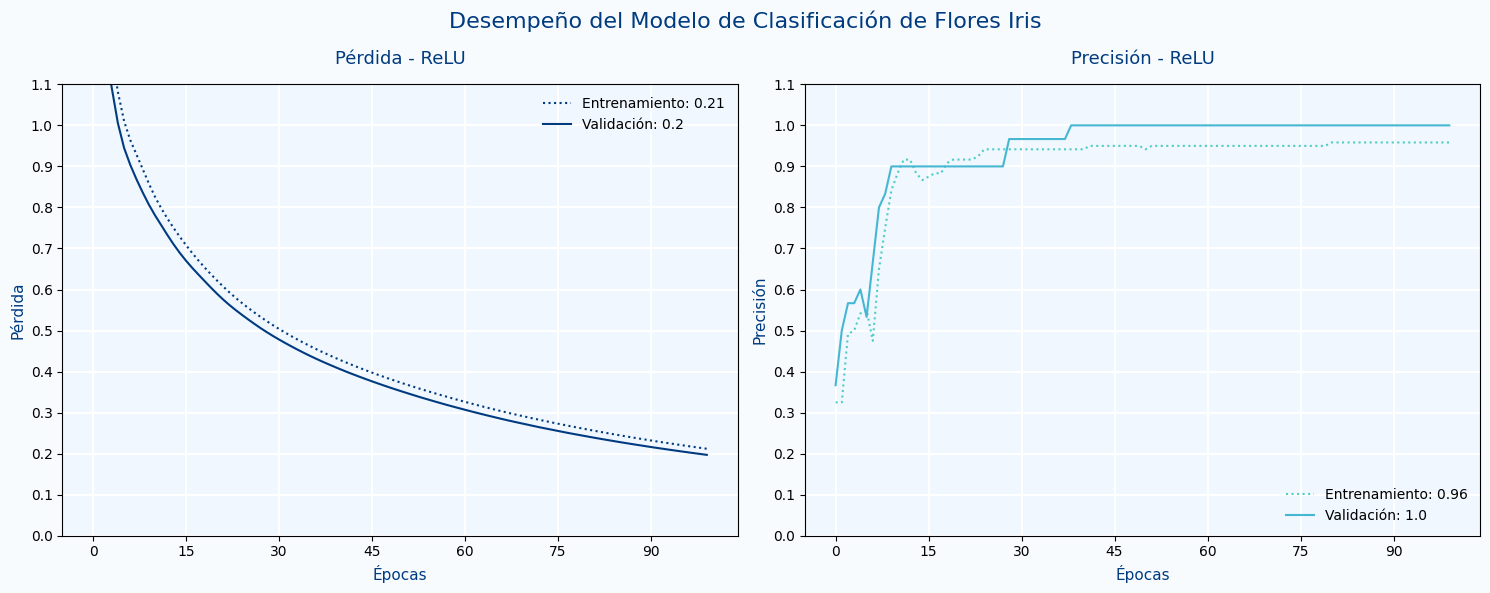

In [6]:
fig = plt.figure(figsize=(15, 6))
fig.set_facecolor("#F8FBFE")  # Fondo de la figura

# Gráfico de Pérdida
ax1 = fig.add_subplot(1, 2, 1)
plot_loss(ax1, history.history, "ReLU")

# Gráfico de Precisión
ax2 = fig.add_subplot(1, 2, 2)
plot_accuracy(ax2, history.history, "ReLU")

# Ajustes finales
plt.suptitle("Desempeño del Modelo de Clasificación de Flores Iris", 
             fontsize=16, color="#003B80", y=0.98)
plt.tight_layout()
plt.show()